# Rivers
Notebook for constructing malaria cases across the main rivers of Colombia

In [3]:
import sys
sys.path.append('src/')
import contextily as cx


In [4]:
# Useful imports
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from constants import *
from utils.publication_functions import beautify_data_column_name
from sklearn.cluster import KMeans
from flows.specific.custom_flow import CustomFlow

# Data sources
from data_sources.specific.coca import Coca
from data_sources.specific.gold_stock_price import GoldStockPrice
from data_sources.specific.malaria_cases import Malaria
from data_sources.specific.malaria_cases_sivigila_4 import MalariaSivigila4
from data_sources.specific.mock_malaria_cases import MockMalaria
from data_sources.specific.temperature_average import TemperatureAverage
from data_sources.specific.temperature_max import TemperatureMax
from data_sources.specific.temperature_min import TemperatureMin
from data_sources.specific.temperature_average import TemperatureAverage
from data_sources.specific.precipitation_average import PrecipitationAverage
from data_sources.specific.precipitation_total import PrecipitationTotal
from data_sources.specific.deforestation_average import DeforestationAverage
from data_sources.specific.deforestation_total import DeforestationTotal

# Embedders
from embedders.specific.identity_embedder import IdentityEmbbeder
from embedders.specific.linear_regression_coefficient_embedder import LinearRegressionCoefficientEmbedder
from embedders.specific.mobility_to_distance_embedder import MobilityToDistanceEmbeder
from embedders.specific.mobility_to_similarity_embedder import MobilityToSimilarityEmbeder

# Clusteres
from clusterers.specific.identity_clusterer import IdentityClusterer
from clusterers.specific.sklearn_vector_clusterer import SklearnVectorClusterer
from clusterers.specific.two_tier_dbscan_clusterer import TwoTierDBSCANClusterer
from clusterers.specific.similarity_community_clusterer import SimilarityCommunityClusterer

# Geographies
from geography.specific.colombian_municipalities import ColombianMunicipalities
from geography.specific.colombian_frontiers import ColombianFrontiers
from geography.specific.colombia_main_rivers import ColombianMainRivers
from geography.general.geography_from_flow_output import GeographyFromFlowOutput

pd.set_option('display.max_rows', 100)



/home/minigonche/Dropbox/Projects/pathogen_study_regions_generator/env/lib/python3.10/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


## 1. Compute Malaria

In [5]:

included_sources = [MalariaSivigila4]
included_matrix_sources = []

flow = CustomFlow(ID = 'malaria_by_river',
                    name = "Malaria By Rivers",
                    time_resolution = MONTH,
                    geography = ColombianMainRivers(),
                    vector_data_sources=included_sources,
                    matrix_data_sources=included_matrix_sources)

flow.run()

Starts Flow: Malaria By Rivers
   Loads Initial Geography
   Loads Data
      Loads Vector Data
      Found 1 elements
         Extracts 1 of 1: Malaria (malaria_sivigila_4) 
         Loads Data
         Builds Overlay
         By Dates. From 2006 to 2021
            2006-01-08T00:00:00.000000000
            2006-01-15T00:00:00.000000000
            2006-01-22T00:00:00.000000000
            2006-01-29T00:00:00.000000000
            2006-02-05T00:00:00.000000000
            2006-03-05T00:00:00.000000000
            2006-03-12T00:00:00.000000000
            2006-04-16T00:00:00.000000000
            2006-04-23T00:00:00.000000000
            2006-04-30T00:00:00.000000000
            2006-05-07T00:00:00.000000000
            2006-05-14T00:00:00.000000000
            2006-05-28T00:00:00.000000000
            2006-06-11T00:00:00.000000000
            2006-06-25T00:00:00.000000000
            2006-07-02T00:00:00.000000000
            2006-07-16T00:00:00.000000000
            2006-08-13T00:00:0

## Visualize

In [5]:
main_rivers = flow.initial_geometry.sort_values('length', ascending=False).head(10)['name']
main_rivers

0    RÍO MAGDALENA
1     RÍO PUTUMAYO
2      RÍO CAQUETÁ
3         RÍO META
4        RÍO CAUCA
5     RÍO GUAVIARE
6     RÍO APAPORIS
7      RÍO VICHADA
8      RÍO INIRIDA
9       RÍO VAUPÉS
Name: name, dtype: object

In [6]:
df = flow.initial_geometry.merge(flow.df_embedded_vector)
col = 'num_cases_by_length'
df[col] = 1000*df['malaria_sivigila_4_num_cases_sum'] / df['length']
#df[col] = df['malaria_sivigila_4_num_cases_sum']

df

,name,length,ID,geometry,date,malaria_sivigila_4_num_cases_average,malaria_sivigila_4_num_cases_sum,num_cases_by_length
0,RÍO MAGDALENA,1599.307276,0,"MULTIPOLYGON (((-75.42103 2.71252, -75.42093 2...",2006-01-31,0.000000,0.000000,0.000000
1,RÍO MAGDALENA,1599.307276,0,"MULTIPOLYGON (((-75.42103 2.71252, -75.42093 2...",2006-02-28,0.000000,0.000000,0.000000
2,RÍO MAGDALENA,1599.307276,0,"MULTIPOLYGON (((-75.42103 2.71252, -75.42093 2...",2006-03-31,0.000000,0.000000,0.000000
3,RÍO MAGDALENA,1599.307276,0,"MULTIPOLYGON (((-75.42103 2.71252, -75.42093 2...",2006-04-30,0.000000,0.000000,0.000000
4,RÍO MAGDALENA,1599.307276,0,"MULTIPOLYGON (((-75.42103 2.71252, -75.42093 2...",2006-05-31,0.333333,0.333333,0.208424
...,...,...,...,...,...,...,...,...
124483,RÍO TOLOTA,0.182310,683,"POLYGON ((-73.36542 6.10662, -73.36619 6.10617...",2020-10-31,0.000000,0.000000,0.000000
124484,RÍO TOLOTA,0.182310,683,"POLYGON ((-73.36542 6.10662, -73.36619 6.10617...",2020-11-30,0.000000,0.000000,0.000000
124485,RÍO TOLOTA,0.182310,683,"POLYGON ((-73.36542 6.10662, -73.36619 6.10617...",2020-12-31,0.000000,0.000000,0.000000
124486,RÍO TOLOTA,0.182310,683,"POLYGON ((-73.36542 6.10662, -73.36619 6.10617...",2021-01-31,0.000000,0.000000,0.000000


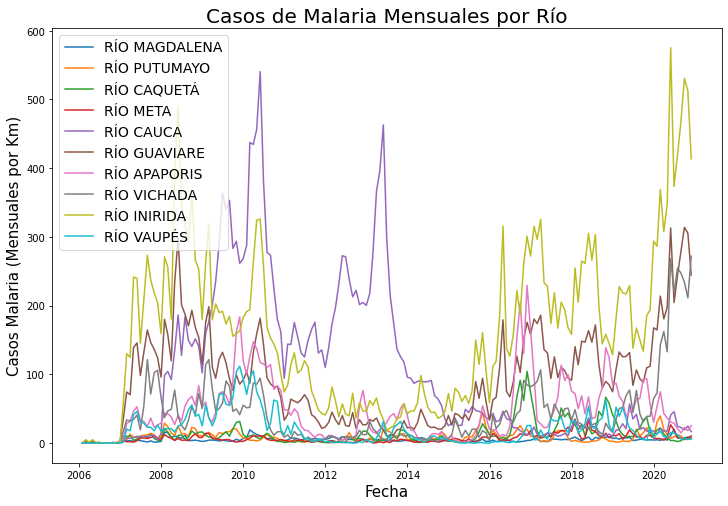

In [7]:
display_df = df
display_df = display_df[display_df.date <= pd.to_datetime("2020-11-30")]
display_df = display_df[display_df['name'].isin(main_rivers)]
#display(df)
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data = display_df, x = 'date', y = col, hue = 'name')
ax.set_xlabel('Fecha', fontsize=15)
ax.set_ylabel('Casos Malaria (Mensuales por Km)', fontsize=15)
ax.set_title('Casos de Malaria Mensuales por Río', fontsize=20)
plt.legend(loc="upper left", frameon=True, fontsize=14)

In [8]:
municipios = ColombianMunicipalities().get_geometry()
municipios = municipios.to_crs(epsg=3857)

Text(0.5, 1.0, 'Casos de Malaria entre 2018-2021')

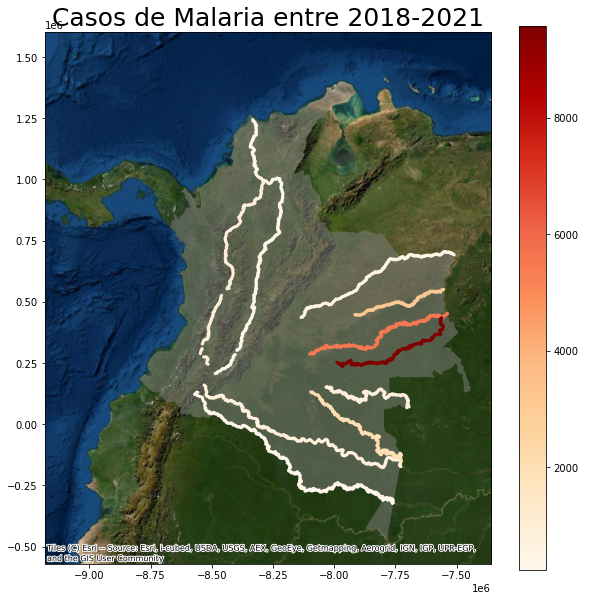

In [10]:
display_df = df
display_df = display_df[display_df.date <= pd.to_datetime("2020-11-30")]
display_df = display_df[display_df.date >= pd.to_datetime("2018-01-01")]
display_df = display_df[display_df['name'].isin(main_rivers)]

display_df = display_df[['ID',col]].groupby(['ID']).sum().reset_index()
display_df = flow.initial_geometry.merge(display_df)


display_df = display_df.to_crs(epsg=3857)

display_df.geometry = display_df.geometry.buffer(5000) 

ax = municipios.plot(color = 'gray', alpha = 0.5, figsize =(10,10))
display_df.plot(column = col, ax = ax, legend = True, cmap='OrRd')
cx.add_basemap(ax, source=cx.providers.Esri.WorldImagery)
ax.set_title('Casos de Malaria entre 2018-2021', fontsize=25)